In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 879 (delta 93), reused 90 (delta 35), pack-reused 726
Receiving objects: 100% (879/879), 50.12 MiB | 38.42 MiB/s, done.
Resolving deltas: 100% (367/367), done.


In [2]:
%cd cytounet 

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import * 

Using TensorFlow backend.


In [4]:
data_gen_args = dict(rotation_range=0.05,
                      rescale = 1./255,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest') 

In [5]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [6]:
my_generator = generate_train_data(5,'examples/legacy/data/train','image','label',
                                   data_gen_args,save_to_dir = None, seed= 2,
                              target_size = (256, 256))

In [7]:
# save space on device
#! rm -rf aug

In [8]:
model = unet(input_size = (256, 256, 1), optimiser='Adam', learning_rate=1e-4, metrics=['accuracy'], loss='binary_crossentropy')

In [9]:
history = model.fit_generator(my_generator,steps_per_epoch= 300 ,epochs= 15)

Epoch 1/15
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
300/300 [==============================] - 70s 232ms/step - loss: 0.4521 - accuracy: 0.7217
Epoch 2/15
300/300 [==============================] - 62s 207ms/step - loss: 0.3533 - accuracy: 0.7504
Epoch 3/15
300/300 [==============================] - 62s 206ms/step - loss: 0.3438 - accuracy: 0.7564
Epoch 4/15
300/300 [==============================] - 62s 206ms/step - loss: 0.3158 - accuracy: 0.7690
Epoch 5/15
300/300 [==============================] - 62s 207ms/step - loss: 0.3096 - accuracy: 0.7711
Epoch 6/15
300/300 [==============================] - 62s 207ms/step - loss: 0.3065 - accuracy: 0.7702
Epoch 7/15
300/300 [==============================] - 62s 207ms/step - loss: 0.2791 - accuracy: 0.7744
Epoch 8/15
300/300 [==============================] - 62s 207ms/step - loss: 0.2945 - accuracy: 0.7692
Epoch 9/15
300/300 [==============================] - 62s 206ms/step - loss: 0.3123 - accuracy: 

In [10]:
model.save("unet_segment.hdf5")

In [12]:
results = predict(model_object=unet(),test_path="examples/legacy/data/test", model_weights="unet_segment.hdf5",
                  image_length=30, image_suffix="png")

30/30 [==============================] - 1s 36ms/step


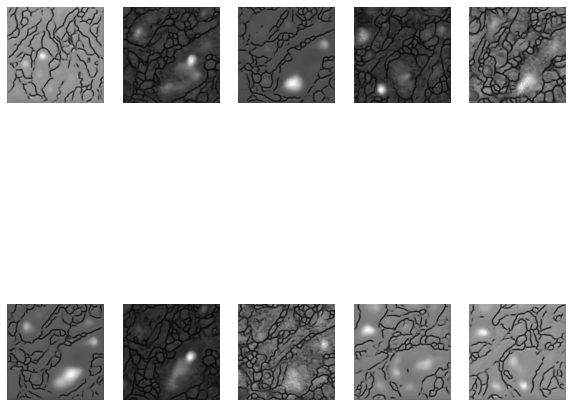

In [13]:
show_images(results, number = 10 )